# **Heart Disease Prediction Project**

## **Introduction**

Heart disease is one of the leading causes of death globally, and early detection can significantly improve patient outcomes. In this project, we build a machine learning model to predict the likelihood of heart disease based on various medical and demographic attributes. Using a dataset that contains information about patients and their heart health, we aim to develop a predictive model that can assist healthcare professionals in identifying individuals at risk.

### **Dataset Overview**

The dataset used in this project, `HeartDiseaseDataset.csv`, contains various features related to patient demographics, medical history, and test results. Each row represents a unique patient, and each column represents a specific attribute that can contribute to the prediction of heart disease.

the Dataset used in this project can be found at:number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Here are the key features:

1. **Age**: The age of the patient in years.
2. **Sex**: The gender of the patient (`1` = male, `0` = female).
3. **ChestPainType**: Describes the type of chest pain experienced by the patient:
   - `0`: Typical angina
   - `1`: Atypical angina
   - `2`: Non-anginal pain
   - `3`: Asymptomatic
4. **RestingBP**: Resting blood pressure measured in mm Hg.
5. **Cholesterol**: Serum cholesterol level in mg/dL.
6. **FastingBS**: Fasting blood sugar (`1` if > 120 mg/dL, `0` otherwise).
7. **RestingECG**: Resting electrocardiographic results:
   - `0`: Normal
   - `1`: ST-T wave abnormality
   - `2`: Left ventricular hypertrophy
8. **MaxHR**: Maximum heart rate achieved during physical activity.
9. **ExerciseAngina**: Whether the patient experiences angina during exercise (`1` = yes, `0` = no).
10. **Oldpeak**: ST depression induced by exercise relative to rest (measured in mm).
11. **ST_Slope**: The slope of the peak exercise ST segment:
    - `0`: Upsloping
    - `1`: Flat
    - `2`: Downsloping
12. **number of major vessels** :0-3 colored by flourosopy13. **
tha**:: 0 = normal; 1 = fixed defect; 2 = reversable defect
42. **Target (Heart Disease Status)**: The target variable indicating the presence of heart disease (`1` = heart disease, `0` = no heart disease).

### **Project Objective**

The goal of this project is to develop a machine learning model that can accurately predict whether a patient is at risk for heart disease based on these medical attributes. We will explore various machine learning algorithms, train them on the data, and evaluate their performance. Finally, we will create a function that can be used to predict heart disease risk for new patients based on their medical data.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Reading

In [3]:
df = pd.read_csv("E:\\Learning\\Machine learning\\Jadi - Machine Learning\\Season 3 - فصل سوم طبقه بندی Classification\\Files\\16325569497737558.csv")
df.head(9)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(df.isna().sum())
print(df["output"].value_counts())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
output
1    165
0    138
Name: count, dtype: int64


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

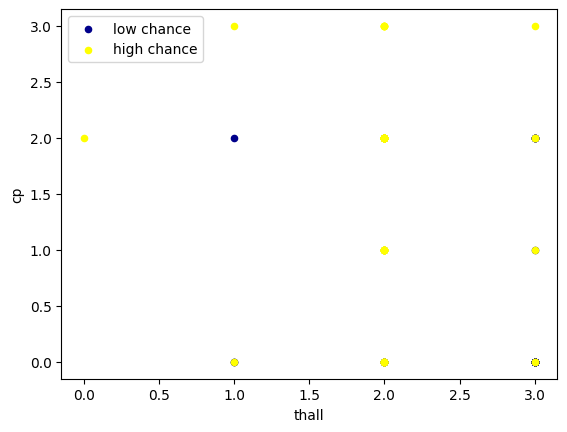

In [11]:
ax = df[df['output']==0][0:50].plot(kind = "scatter" , x = 'thall' , y = "cp" , color = "darkblue" , label= "low chance");
df[df['output']==1][0:50].plot(kind = "scatter" , x = 'thall' , y = "cp" , color = "yellow" , label= "high chance" , ax=ax)
plt.show()

In [12]:
X=df.drop(columns = ['output'])
y = np.asanyarray(df['output'])
X[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Data Preprocessing
handling missing valuesand scaling numeric features using StandardScaler

In [15]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = np.asanyarray(X)

# Splitting the Data

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 4)
print(f"train set: {X_train.shape} , {y_train.shape}")
print(f"test set: {X_test.shape} , {y_test.shape}")

train set: (242, 13) , (242,)
test set: (61, 13) , (61,)


# SVM Model

In [20]:
kernels = ["rbf" , "linear" , "poly" , "sigmoid"]
score_list={}
for kernel in kernels:
    clf = svm.SVC(kernel = kernel)
    clf.fit(X_train , y_train)
    yhat = clf.predict(X_test)
    f1_s = metrics.f1_score(y_test , yhat , average = "weighted")
    jac_s = metrics.jaccard_score(y_test , yhat , pos_label = 1)
    score_list.update({kernel:f1_s})
    print(kernel , ":f1_socre = %.2f"%f1_s)
    print(kernel , ":jaccard_score = %.4f"%jac_s)
    

rbf :f1_socre = 0.87
rbf :jaccard_score = 0.7838
linear :f1_socre = 0.90
linear :jaccard_score = 0.8421
poly :f1_socre = 0.80
poly :jaccard_score = 0.7143
sigmoid :f1_socre = 0.88
sigmoid :jaccard_score = 0.8250


In [22]:
max_score = max(score_list.values())
best_kernel = max(score_list , key=score_list.get)
print("best kernel is",best_kernel,"with score:%.2f"%max_score)

best kernel is linear with score:0.90


In [24]:
clf = svm.SVC(kernel = "linear")
clf.fit(X_train , y_train)
Svm_yhat = clf.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[23  2]
 [ 4 32]]


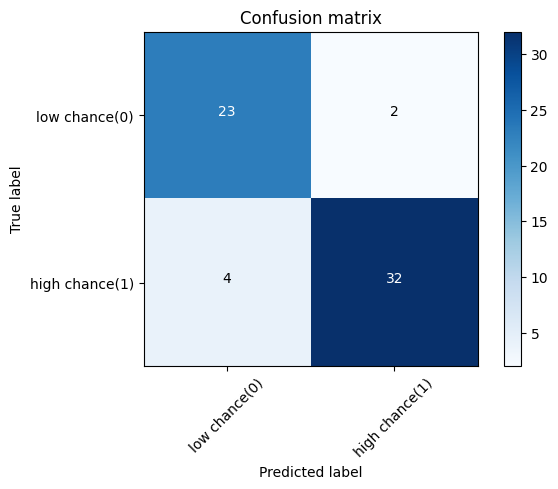

In [28]:
Scnf_matrix = confusion_matrix(y_test , Svm_yhat , labels=[0 , 1])
np.set_printoptions(precision= 2)

print(classification_report(y_test , Svm_yhat))
plot_confusion_matrix(Scnf_matrix , classes = ["low chance(0)" , "high chance(1)"])

# KNN Model

In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for k in range(1 , Ks):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train , y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test , y_hat)
    std_acc[k-1]= np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc

array([0.77, 0.77, 0.8 , 0.8 , 0.8 , 0.82, 0.84, 0.82, 0.82])

In [33]:
print(f"best K is {mean_acc.argmax()+1} , with accuracy %.2f"%mean_acc.max())

best K is 7 , with accuracy 0.84


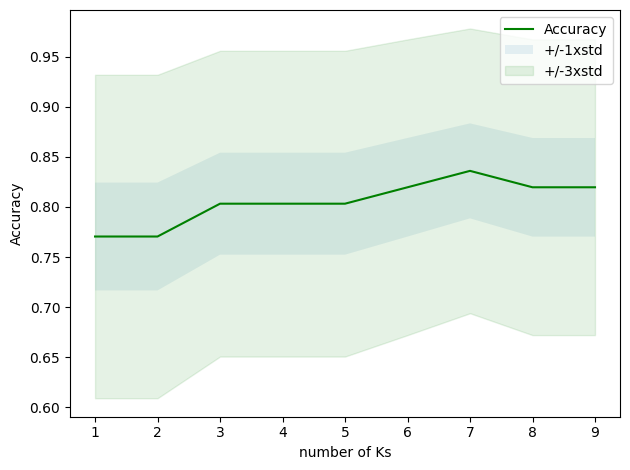

In [35]:
plt.plot(range(1,Ks) , mean_acc , "g")
plt.fill_between(range(1,Ks) , mean_acc-1*std_acc , mean_acc+1*std_acc , alpha = 0.1)
plt.fill_between(range(1,Ks) , mean_acc-3*std_acc , mean_acc+3*std_acc , alpha = 0.1 , color="green")
plt.legend(("Accuracy" , "+/-1xstd", "+/-3xstd"))
plt.xlabel("number of Ks")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix, without normalization
[[21  4]
 [ 6 30]]


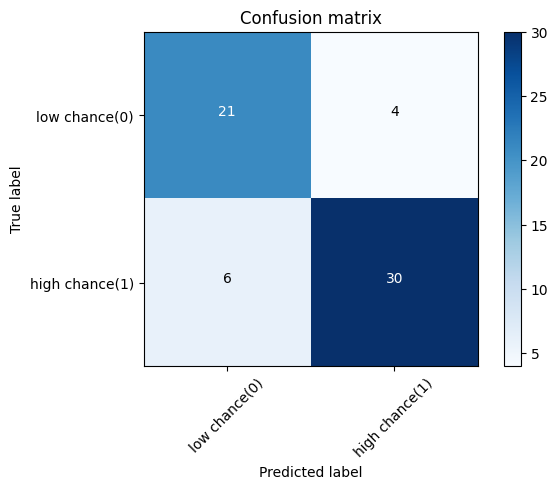

In [37]:
neigh = KNeighborsClassifier(n_neighbors = 7)
neigh.fit(X_train , y_train)
Knn_yhat = neigh.predict(X_test)

Kcnf_matrix = confusion_matrix(y_test , Knn_yhat , labels=[0 , 1])
np.set_printoptions(precision= 2)

print(classification_report(y_test , y_hat))
plot_confusion_matrix(Kcnf_matrix , classes = ["low chance(0)" , "high chance(1)"])

# Logistic Regression

In [40]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
score = {}
for solver in solvers:
    LR = LogisticRegression(C=0.01 , solver=solver)
    LR.fit(X_train , y_train)
    yhat_=LR.predict(X_test)
    f1_sc = metrics.f1_score(y_test , yhat_ , average = "weighted")
    jac_sc = metrics.jaccard_score(y_test , yhat_ , pos_label = 1)
    score.update({solver:f1_sc})
    print(solver , ":f1_socre = %.4f"%f1_sc)
    print(solver , ":jaccard_score = %.4f"%jac_sc)

lbfgs :f1_socre = 0.9000
lbfgs :jaccard_score = 0.8537
liblinear :f1_socre = 0.8849
liblinear :jaccard_score = 0.8250
newton-cg :f1_socre = 0.9000
newton-cg :jaccard_score = 0.8537
newton-cholesky :f1_socre = 0.9000
newton-cholesky :jaccard_score = 0.8537
sag :f1_socre = 0.9000
sag :jaccard_score = 0.8537
saga :f1_socre = 0.9000
saga :jaccard_score = 0.8537


In [42]:
max_score = max(score.values())
best_kernel = max(score , key=score.get)
print("best solver is",solver,"with score:%.2f"%max_score)

best solver is saga with score:0.90


In [44]:
LR = LogisticRegression(C=0.01 , solver="saga")
LR.fit(X_train , y_train)
Lr_yhat=LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion matrix, without normalization
[[20  5]
 [ 1 35]]


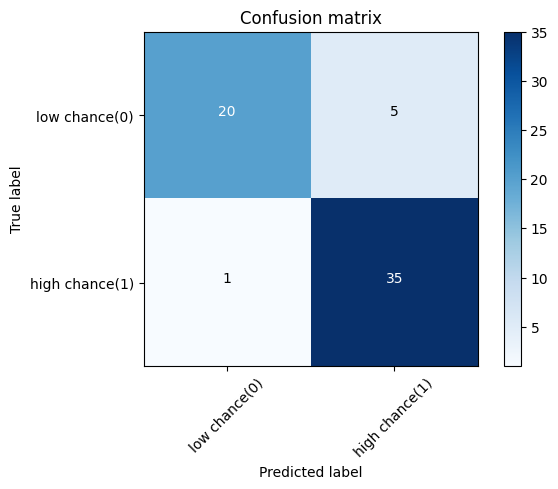

In [46]:
Lcnf_matrix = confusion_matrix(y_test , Lr_yhat , labels=[0 , 1])
np.set_printoptions(precision= 2)

print(classification_report(y_test , Lr_yhat))
plot_confusion_matrix(Lcnf_matrix , classes = ["low chance(0)" , "high chance(1)"])

In [48]:
print(f"""SVM : 
   {classification_report(y_test , Svm_yhat)}""")
print("-----------------------------------------------------------")
print(f"""Logistic Regression : 
   {classification_report(y_test , Lr_yhat)}""")
print("-----------------------------------------------------------")
print(f"""KNN : 
   {classification_report(y_test , Knn_yhat)}""")

SVM : 
                 precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

-----------------------------------------------------------
Logistic Regression : 
                 precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

-----------------------------------------------------------
KNN : 
                 precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy    

### Prediction Function
A function is created to predict heart disease using the trained model for new inputs.

In [56]:
encoders = {
    'sex': LabelEncoder().fit(["female", "male"]),
    'cp': LabelEncoder().fit(["direct pain", "Indirect pain", "Non-cardiac pain", "asymptomatic"]),
    'fbs': LabelEncoder().fit(["no", "yes"]),
    'restecg': LabelEncoder().fit(["normal", "abnormal st", "big left ventricle"]),
    'exng': LabelEncoder().fit(["no", "yes"]),
    'thall': LabelEncoder().fit(["", "Normal", "Fixed defect", "Reversible defect"]),
    'slp': LabelEncoder().fit(["Downsloping", "Flat", "Upsloping"])}

def predicting_HeartDisease(model , age, sex, cp, trtbps, chol, fbs, restecg, thalachh,
       exng, oldpeak, slp, caa, thall):
    data = pd.DataFrame({
        'age':[age], 
        'sex':[sex], 
        'cp':[cp], 
        'trtbps':[trtbps], 
        'chol':[chol], 
        'fbs':[fbs], 
        'restecg':[restecg], 
        'thalachh':[thalachh],
       'exng':[exng], 
        'oldpeak':[oldpeak], 
        'slp':[slp], 
        'caa':[caa], 
        'thall':[thall]
    })
    features = ['sex', 'cp', 'fbs', 'restecg','exng', 'thall' , 'slp']
    for f in features:
        data[f]=encoders[f].transform(data[f])
    data = scaler.transform(data)
    predicted_value = model.predict(data)
    if predicted_value==1:
        return("High Chance")
    else:
        return("low chance")

### Making a Prediction
A sample prediction is made using the prediction function with hardcoded values for a new patient

In [58]:
age = 41 
sex = "female" 
cp = "direct pain"
trtbps = 120
chol = 250
fbs = "no"
restecg = "abnormal st"
thalachh= 162
exng = "no" 
oldpeak = 0.6
slp= "Flat"
caa = 1 
thall="Fixed defect"

prediction = predicting_HeartDisease(LR , age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall )
print(prediction)

High Chance


## **Conclusion**

In this project, we explored three different machine learning models — Support Vector Machine (SVM), Logistic Regression, and K-Nearest Neighbors (KNN) — to predict heart disease using a medical dataset. After training and evaluating each model on the test data, we compared their performance based on key classification metrics: precision, recall, and F1-score.

### **Model Performance Overview**

- **Support Vector Machine (SVM)**: 
  - **Accuracy**: 90%
  - **F1-score**: 0.88 for class 0, 0.91 for class 1
  - SVM demonstrated balanced performance across both classes, with a slightly higher F1-score for predicting heart disease (class 1). Its recall for class 0 (non-heart disease) was notably strong, indicating it was better at identifying patients without heart disease.

- **Logistic Regression**: 
  - **Accuracy**: 90%
  - **F1-score**: 0.87 for class 0, 0.92 for class 1
  - Logistic Regression achieved similar accuracy to SVM but showed a higher precision for predicting class 0 (non-heart disease). This suggests that the model was more conservative in classifying patients as not having heart disease, while maintaining a strong recall for predicting patients with heart disease (class 1).

- **K-Nearest Neighbors (KNN)**:
  - **Accuracy**: 84%
  - **F1-score**: 0.81 for class 0, 0.86 for class 1
  - KNN had the lowest accuracy among the three models, with a slightly lower F1-score for both classes. While its performance was decent, especially for predicting heart disease, it didn’t generalize as well as SVM or Logistic Regression.

### **Conclusion**
Both **SVM** and **Logistic Regression** achieved an accuracy of 90%, outperforming **KNN** (84%). Between the two, Logistic Regression provided slightly better precision and recall for identifying patients with heart disease (class 1), while SVM was more balanced across both classes. 

Logistic Regression might be the preferred model when false negatives (i.e., failing to detect heart disease) are a critical concern, due to its higher recall for class 1. However, SVM’s balanced performance could be useful when a more conservative and evenly distributed prediction across both classes is needed.

### **Future Work**
To further improve these models, future work could explore hyperparameter tuning, ensemble methods, or deeper exploration of feature selection techniques. Moreover, adding more data or using techniques like cross-validation can help further refine model performance and generalization.